# WeatherPy
----

#### Analysis
* Disclaimer: the locations included in this exercise exclude, for the most part, anything below the -60 to -80 degree line in the southern hemisphere, which makes sense, as these areas are more sparsely populated and there are fewer cities for citipy to connect with the coordinates

* The Latitude vs Temperature graph demonstrates a noticeable increase in temperature as the location approaches the equator, and a substantial decrease the further north the city is (again, locations to the very far south were excluded due to lack of corresponding city data)

* Humidity at the equator appears to be very high, then spans a wider spectrum between latitudes of 20 to 40 degrees (ranging from ~10% to ~90%), and then rises again further to the north and south.

* It is difficult to detect any trends between coordinates and cloud coverage, which makes sense, as there are many factors that contribute to cloud coverage, including some that are not measured here (e.g. topography): https://socratic.org/questions/how-are-clouds-formed-and-what-factors-affect-their-formation

* The highest wind speeds appear at the southern and northern-most limits of the data.

In [ ]:
pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
from RH_api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_count = 1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = city_count)
lngs = np.random.uniform(low=-180.000, high=180.000, size=city_count)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# Establish base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Create empty lists to store responses
dates = []
latitudes = []
temperatures = []
humidities = []
cloudiness = []
wind_speeds = []
valid_cities = []

# Loop through cities
for city in cities:
    # Create one second interval between calls
    #time.sleep(1)
    
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    #Save request to variable, format variable as json object
    city_weather = requests.get(query_url)
    weather_json = city_weather.json()  
    
    #print current row, pull out necessary info, save to corresponding list
    try:
        print(f'Processing record {cities.index(city)+1} of {len(cities)}: {weather_json["name"]}')
        
        date = weather_json["dt"]
        lat = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        clouds = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]      
        
        valid_cities.append (city)
        
        dates.append(date)
              
        latitudes.append(lat)
              
        temperatures.append(temperature)
        
        humidities.append(humidity)
    
        cloudiness.append(clouds)
        
        wind_speeds.append(wind_speed)
    
    #exclude rows where weather data is complete      
    except KeyError:
        print ('Name not found, next record')



Processing record 1 of 627: Harper
Processing record 2 of 627: Yumen
Processing record 3 of 627: Bathsheba
Name not found, next record
Processing record 5 of 627: Tasiilaq
Processing record 6 of 627: Yantal
Processing record 7 of 627: Poso
Processing record 8 of 627: Kjollefjord
Processing record 9 of 627: Ende
Processing record 10 of 627: Floro
Processing record 11 of 627: Avera
Processing record 12 of 627: Port Blair
Processing record 13 of 627: Port Alfred
Processing record 14 of 627: Mataura
Processing record 15 of 627: Pevek
Processing record 16 of 627: Kardonikskaya
Processing record 17 of 627: Lata
Processing record 18 of 627: Beisfjord
Processing record 19 of 627: Ushuaia
Processing record 20 of 627: Capinopolis
Processing record 21 of 627: Egvekinot
Processing record 22 of 627: Arlit
Processing record 23 of 627: Roald
Processing record 24 of 627: Busselton
Name not found, next record
Processing record 26 of 627: Nanakuli
Processing record 27 of 627: Saint-Philippe
Processing r

Processing record 217 of 627: Ciego de Avila
Processing record 218 of 627: Itaperucu
Processing record 219 of 627: Port Hueneme
Processing record 220 of 627: Zeya
Processing record 221 of 627: Nemuro
Processing record 222 of 627: Evreux
Processing record 223 of 627: Bluff
Processing record 224 of 627: Zelenogorskiy
Processing record 225 of 627: Dosso
Processing record 226 of 627: Cabo San Lucas
Processing record 227 of 627: Hovd
Processing record 228 of 627: Duldurga
Processing record 229 of 627: Yar-Sale
Name not found, next record
Processing record 231 of 627: Tshikapa
Processing record 232 of 627: Oga
Processing record 233 of 627: Santa Cruz
Processing record 234 of 627: Kalengwa
Processing record 235 of 627: Saint-Augustin
Processing record 236 of 627: Ust-Maya
Processing record 237 of 627: Shalya
Processing record 238 of 627: Alibag
Processing record 239 of 627: Arraial do Cabo
Processing record 240 of 627: Lorengau
Processing record 241 of 627: Azul
Name not found, next record
Pr

Processing record 431 of 627: Podgorica
Processing record 432 of 627: Komsomolskiy
Processing record 433 of 627: Santa Rosa
Processing record 434 of 627: Ingham
Name not found, next record
Name not found, next record
Processing record 437 of 627: Tual
Processing record 438 of 627: Mporokoso
Processing record 439 of 627: Sheltozero
Processing record 440 of 627: Vangaindrano
Processing record 441 of 627: Shimanovsk
Processing record 442 of 627: Chumikan
Processing record 443 of 627: Namibe
Processing record 444 of 627: Aginskoye
Processing record 445 of 627: Mecca
Name not found, next record
Processing record 447 of 627: Nanchong
Processing record 448 of 627: Lakatoro
Processing record 449 of 627: Finschhafen
Processing record 450 of 627: Osa
Processing record 451 of 627: Tadine
Processing record 452 of 627: Matara
Processing record 453 of 627: Vila Franca do Campo
Processing record 454 of 627: Nathdwara
Processing record 455 of 627: Outjo
Processing record 456 of 627: Kingman
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
weather = pd.DataFrame ({"Name":valid_cities,
                        "Latitude": latitudes,
                         "Date": dates,
                       "Current Temp.": temperatures ,
                       "Humidity":humidities,
                       "Cloudiness":cloudiness,
                       "Wind Speed": wind_speeds})



weather.to_csv("Resources/city_weather_info.csv", index=True, header=True)

weather.head()

,Name,Latitude,Date,Current Temp.,Humidity,Cloudiness,Wind Speed
0,harper,30.30,1571529436,30.01,20,1,4.10
1,yumen,40.29,1571529436,3.06,24,0,1.99
2,bathsheba,13.22,1571529437,27.00,78,20,3.60
3,tasiilaq,65.61,1571529437,1.00,64,100,1.49
4,yantal,56.85,1571529437,-6.10,95,85,0.93


In [48]:
weather['Date']= pd.to_datetime(weather['Date'], unit='s')
weather.head()

,Name,Latitude,Date,Current Temp.,Humidity,Cloudiness,Wind Speed
0,harper,30.30,2019-10-19 23:57:16,30.01,20,1,4.10
1,yumen,40.29,2019-10-19 23:57:16,3.06,24,0,1.99
2,bathsheba,13.22,2019-10-19 23:57:17,27.00,78,20,3.60
3,tasiilaq,65.61,2019-10-19 23:57:17,1.00,64,100,1.49
4,yantal,56.85,2019-10-19 23:57:17,-6.10,95,85,0.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

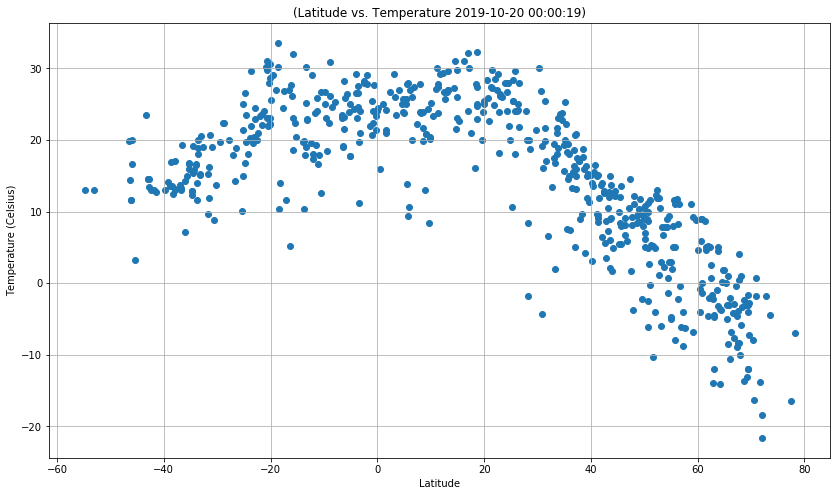

In [49]:

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(latitudes, temperatures, marker="o")

# Incorporate the other graph properties
#plt.figure(figsize=(20,10))
plt.title(f'(Latitude vs. Temperature {(weather["Date"].iloc[-1])})')
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/LatitudeVsTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

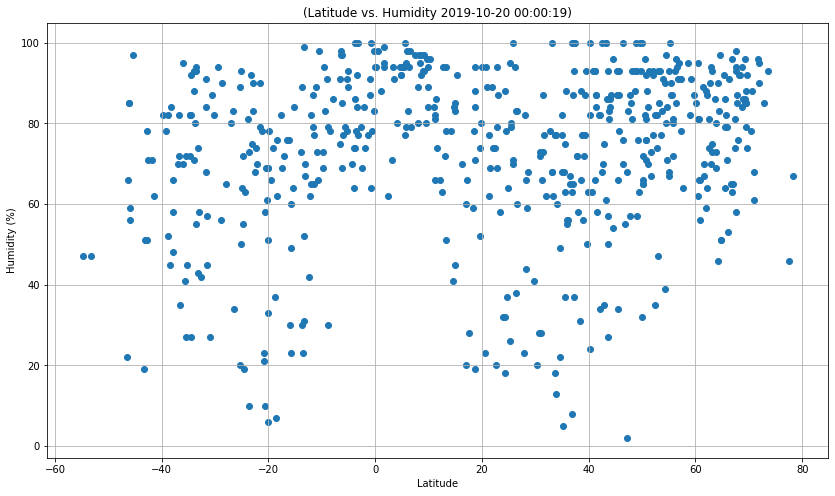

In [50]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(latitudes, humidities, marker="o")

# Incorporate the other graph properties
#plt.figure(figsize=(20,10))
plt.title(f'(Latitude vs. Humidity {(weather["Date"].iloc[-1])})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

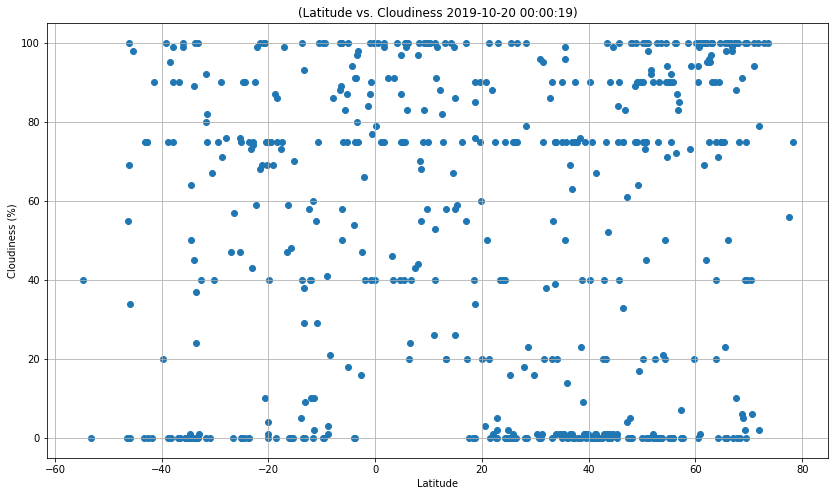

In [51]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(latitudes, cloudiness, marker="o")

# Incorporate the other graph properties
#plt.figure(figsize=(20,10))
plt.title(f'(Latitude vs. Cloudiness {(weather["Date"].iloc[-1])})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

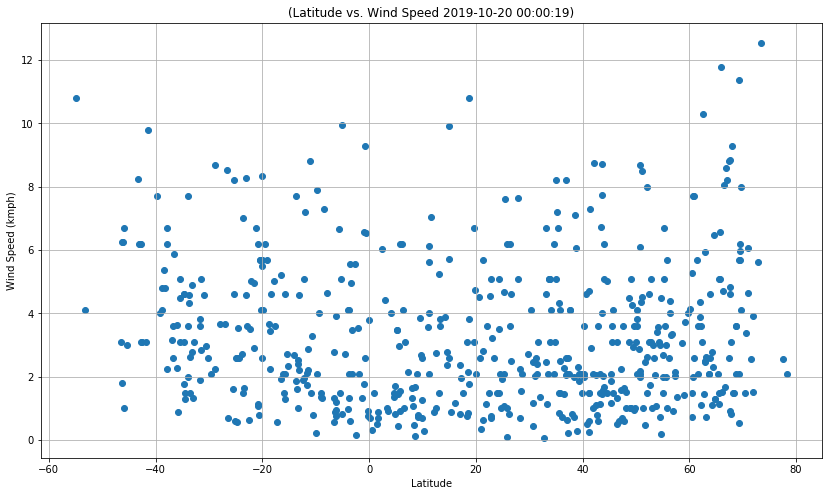

In [52]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(latitudes, wind_speeds, marker="o")

# Incorporate the other graph properties
#plt.figure(figsize=(20,10))
plt.title(f'(Latitude vs. Wind Speed {(weather["Date"].iloc[-1])})')
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/LatitudeVsWindSpeeds.png")

# Show plot
plt.show()